In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('pollution.csv')

In [4]:
data.isna().sum()

country            0
state              0
city               0
station            0
last_update        0
latitude           0
longitude          0
pollutant_id       0
pollutant_min    233
pollutant_max    233
pollutant_avg    233
dtype: int64

In [5]:
data.dropna(inplace=True)
data.isna().sum()

country          0
state            0
city             0
station          0
last_update      0
latitude         0
longitude        0
pollutant_id     0
pollutant_min    0
pollutant_max    0
pollutant_avg    0
dtype: int64

In [6]:
data.drop(data[data['pollutant_id']!='PM2.5'].index,inplace=True)
data

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
3,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",21-04-2024 12:00:00,16.987287,81.736318,PM2.5,5.0,40.0,22.0
6,India,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",21-04-2024 12:00:00,13.670000,79.350000,PM2.5,50.0,80.0,62.0
11,India,Assam,Guwahati,"IITG, Guwahati - PCBA",21-04-2024 12:00:00,26.202864,91.700464,PM2.5,19.0,55.0,40.0
17,India,Assam,Guwahati,"Railway Colony, Guwahati - PCBA",21-04-2024 12:00:00,26.181742,91.780630,PM2.5,1.0,58.0,24.0
24,India,Bihar,Bettiah,"Kamalnath Nagar, Bettiah - BSPCB",21-04-2024 12:00:00,26.803650,84.519540,PM2.5,110.0,500.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...
3158,India,West_Bengal,Haldia,"Priyambada Housing Estate, Haldia - WBPCB",21-04-2024 12:00:00,22.060470,88.109737,PM2.5,15.0,48.0,25.0
3161,India,West_Bengal,Howrah,"Belur Math, Howrah - WBPCB",21-04-2024 12:00:00,22.629801,88.352017,PM2.5,31.0,91.0,55.0
3163,India,West_Bengal,Howrah,"Ghusuri, Howrah - WBPCB",21-04-2024 12:00:00,22.611968,88.347422,PM2.5,35.0,320.0,105.0
3166,India,West_Bengal,Howrah,"Padmapukur, Howrah - WBPCB",21-04-2024 12:00:00,22.568732,88.279728,PM2.5,30.0,88.0,62.0


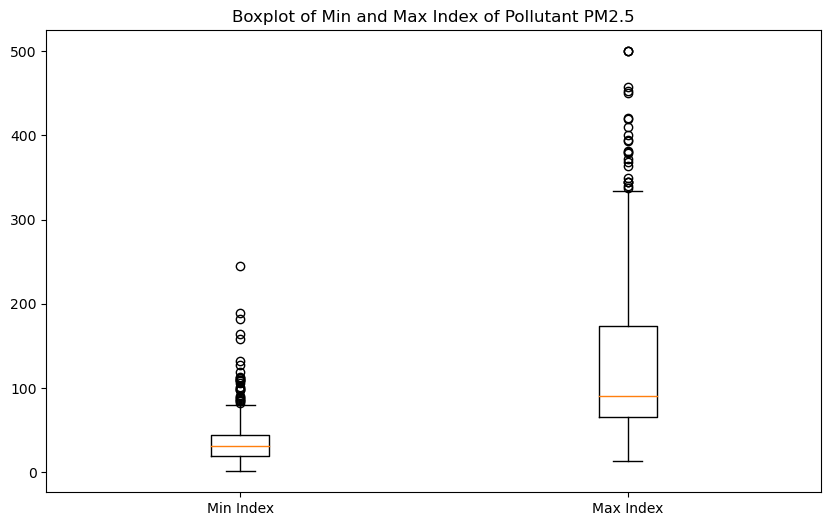

In [9]:
import matplotlib.pyplot as plt
# create a boxplot for minimum and maximum index of pollutant
plt.figure(figsize=(10,6))
plt.boxplot([data['pollutant_min'], data['pollutant_max']], labels=['Min Index', 'Max Index'])
plt.title('Boxplot of Min and Max Index of Pollutant PM2.5')
plt.show()


In [13]:
# Calculate the first quartile and the third quartile
Q1 = np.percentile(data['pollutant_min'], 25)
Q3 = np.percentile(data['pollutant_max'], 75)

# Calculate the interquartile range
IQR = Q3 - Q1

# Define the lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove any data points that fall outside of the lower and upper limits
new_df = data[(data['pollutant_min'] > lower_limit) & (data['pollutant_max'] < upper_limit)]
new_df

,country,state,city,station,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg
3,India,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",21-04-2024 12:00:00,16.987287,81.736318,PM2.5,5.0,40.0,22.0
6,India,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",21-04-2024 12:00:00,13.670000,79.350000,PM2.5,50.0,80.0,62.0
11,India,Assam,Guwahati,"IITG, Guwahati - PCBA",21-04-2024 12:00:00,26.202864,91.700464,PM2.5,19.0,55.0,40.0
17,India,Assam,Guwahati,"Railway Colony, Guwahati - PCBA",21-04-2024 12:00:00,26.181742,91.780630,PM2.5,1.0,58.0,24.0
28,India,Bihar,Bhagalpur,"Mayaganj, Bhagalpur - BSPCB",21-04-2024 12:00:00,25.265194,87.012947,PM2.5,50.0,318.0,103.0
...,...,...,...,...,...,...,...,...,...,...,...
3158,India,West_Bengal,Haldia,"Priyambada Housing Estate, Haldia - WBPCB",21-04-2024 12:00:00,22.060470,88.109737,PM2.5,15.0,48.0,25.0
3161,India,West_Bengal,Howrah,"Belur Math, Howrah - WBPCB",21-04-2024 12:00:00,22.629801,88.352017,PM2.5,31.0,91.0,55.0
3163,India,West_Bengal,Howrah,"Ghusuri, Howrah - WBPCB",21-04-2024 12:00:00,22.611968,88.347422,PM2.5,35.0,320.0,105.0
3166,India,West_Bengal,Howrah,"Padmapukur, Howrah - WBPCB",21-04-2024 12:00:00,22.568732,88.279728,PM2.5,30.0,88.0,62.0


In [18]:
df=new_df.groupby(['city','pollutant_id']).agg({'pollutant_min': 'min', 'pollutant_max': 'min'})

In [19]:
df['determiner'] = (df['pollutant_max']+df['pollutant_min'])/2
df

,,pollutant_min,pollutant_max,determiner
city,pollutant_id,,,
Agartala,PM2.5,34.0,135.0,84.5
Agra,PM2.5,3.0,49.0,26.0
Ahmedabad,PM2.5,18.0,78.0,48.0
Ahmednagar,PM2.5,34.0,238.0,136.0
Aizawl,PM2.5,23.0,40.0,31.5
...,...,...,...,...
Vijayawada,PM2.5,37.0,53.0,45.0
Visakhapatnam,PM2.5,27.0,92.0,59.5
Vrindavan,PM2.5,25.0,98.0,61.5


In [20]:
bins = [0, 12, 35.5, 55.5, 150.4, np.inf]
categories = ['very healthy', 'healthy', 'moderate', 'unhealthy', 'very unhealthy']
df['classification'] = pd.cut(df['determiner'], bins=bins, labels=categories, right=False)

In [21]:
df

,,pollutant_min,pollutant_max,determiner,classification
city,pollutant_id,,,,
Agartala,PM2.5,34.0,135.0,84.5,unhealthy
Agra,PM2.5,3.0,49.0,26.0,healthy
Ahmedabad,PM2.5,18.0,78.0,48.0,moderate
Ahmednagar,PM2.5,34.0,238.0,136.0,unhealthy
Aizawl,PM2.5,23.0,40.0,31.5,healthy
...,...,...,...,...,...
Vijayawada,PM2.5,37.0,53.0,45.0,moderate
Visakhapatnam,PM2.5,27.0,92.0,59.5,unhealthy
Vrindavan,PM2.5,25.0,98.0,61.5,unhealthy


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = df[['pollutant_min', 'pollutant_max', 'determiner']]  # Features
y = df['classification']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the KNN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Step 4: Test the classifier
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9782608695652174


In [24]:
new_values = [[35,150,92.5]] #checking pm2.5 index for Manhattan city

# Convert the new values into a DataFrame
new_data = pd.DataFrame(new_values, columns=['pollutant_min', 'pollutant_max', 'determiner'])

# Test the model with the new data
predictions = knn.predict(new_data)

# Print the predictions
print("Predictions:", predictions)

Predictions: ['unhealthy']


In [25]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


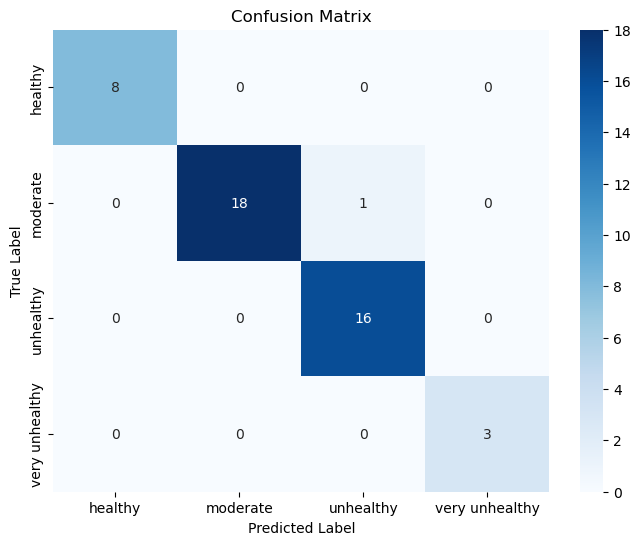

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained the KNN classifier and made predictions on the test set

# Get the unique classes from the target variable
classes = np.unique(np.concatenate((y_test, y_pred)))

# Calculate the confusion matrix with the specified classes
conf_matrix = confusion_matrix(y_test, y_pred, labels=classes)

# Convert confusion matrix to DataFrame for visualization
conf_df = pd.DataFrame(conf_matrix, index=classes, columns=classes)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
